In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('File1.csv')

Using TensorFlow backend.


In [3]:
df

,urutan,bulan,data,rata2
0,0,1983-01-01,54598.367107,29.673026
1,1,1983-02-01,54663.252209,29.708289
2,2,1983-03-01,55475.812933,30.149898
3,3,1983-04-01,55155.629024,29.975885
4,4,1983-05-01,53593.976395,29.127161
...,...,...,...,...
403,403,2016-08-01,56240.606407,30.565547
404,404,2016-09-01,56647.585022,30.786731
405,405,2016-10-01,56401.566578,30.653025
406,406,2016-11-01,54655.972265,29.704333


In [4]:
df=df.drop(columns=['urutan','rata2'])

In [5]:
df.bulan = pd.to_datetime(df.bulan)
df = df.set_index("bulan")
data_ = df[:-48]
df=df[:-60]

In [6]:
train, test = df[:-12], df[-12:]

In [7]:
test

,data
bulan,
2011-01-01,53383.553333
2011-02-01,54448.821884
2011-03-01,54605.942356
2011-04-01,54671.303606
2011-05-01,55088.278383
2011-06-01,54427.702154
2011-07-01,54512.308691
2011-08-01,55491.552910
2011-09-01,56272.064661


In [8]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [9]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [10]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [11]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
54/54 [==============================] - 1s 15ms/step - loss: 0.0616
Epoch 2/90
54/54 [==============================] - 1s 11ms/step - loss: 0.0405
Epoch 3/90
54/54 [==============================] - 1s 11ms/step - loss: 0.0384
Epoch 4/90
54/54 [==============================] - 1s 10ms/step - loss: 0.0361
Epoch 5/90
54/54 [==============================] - 1s 10ms/step - loss: 0.0346
Epoch 6/90
54/54 [==============================] - 1s 10ms/step - loss: 0.0304
Epoch 7/90
54/54 [==============================] - 1s 10ms/step - loss: 0.0290
Epoch 8/90
54/54 [==============================] - 1s 10ms/step - loss: 0.0286
Epoch 9/90
54/54 [==============================] - 1s 12ms/step - loss: 0.0293
Epoch 10/90
54/54 [==============================] - 1s 11ms/step - loss: 0.0259
Epoch 11/90
54/54 [==============================] - 1s 12ms/step - loss: 0.0289
Epoch 12/90
54/54 [==============================] - 1s 11ms/step - loss: 0.0267
Epoch 13/90
54/54 [==================

In [12]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0.36102168],
        [0.59852961],
        [0.66844751],
        [0.56617411],
        [0.35087187],
        [0.51669255],
        [0.32203385],
        [0.53238923],
        [0.46686082],
        [0.58345887],
        [0.39543495],
        [0.01024521]]])

In [13]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list

[array([0.18809068], dtype=float32),
 array([0.3101028], dtype=float32),
 array([0.45414525], dtype=float32),
 array([0.41580307], dtype=float32),
 array([0.3210248], dtype=float32),
 array([0.23074609], dtype=float32),
 array([0.2104836], dtype=float32),
 array([0.29087773], dtype=float32),
 array([0.42117268], dtype=float32),
 array([0.561422], dtype=float32),
 array([0.40837342], dtype=float32),
 array([0.27001908], dtype=float32)]

In [14]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


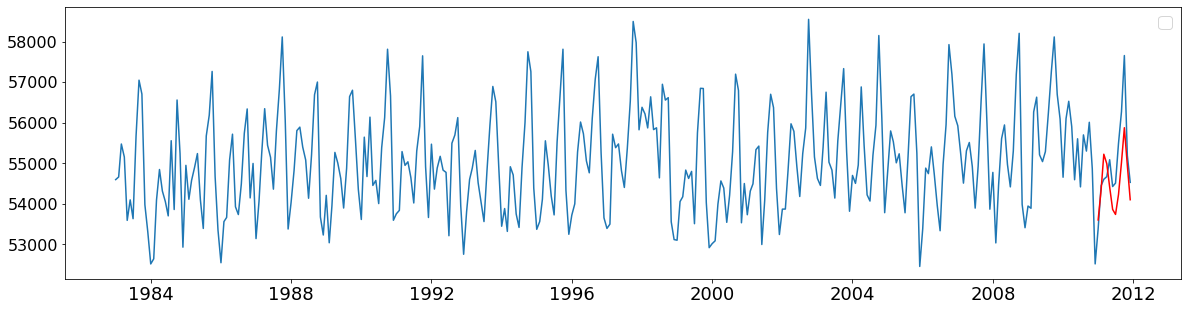

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['data'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [16]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [840.40683622]


In [17]:
train = df

In [18]:
scaler.fit(train)
train = scaler.transform(train)

In [19]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [20]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
56/56 [==============================] - 1s 11ms/step - loss: 0.0169
Epoch 2/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0152
Epoch 3/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0160
Epoch 4/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0147
Epoch 5/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0155
Epoch 6/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0155
Epoch 7/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0156
Epoch 8/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0158
Epoch 9/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0146
Epoch 10/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0153
Epoch 11/90
56/56 [==============================] - 1s 12ms/step - loss: 0.0160
Epoch 12/90
56/56 [==============================] - 1s 13ms/step - loss: 0.0143
Epoch 13/90
56/56 [==================

In [21]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [22]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [23]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


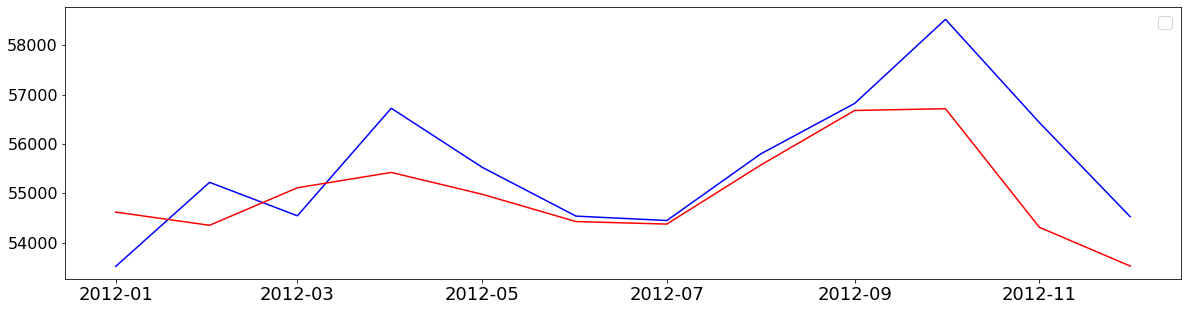

In [24]:
df_asli = data_
plt.figure(figsize=(20, 5))
# plt.plot(df_proj.index, df_proj['data'])
plt.plot(df_asli[-12:].index, df_asli['data'][-12:],color='b')
plt.plot(df_proj[-12:].index, df_proj['Prediction'][-12:], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [25]:
MAE = df_proj['Prediction'][-12:]-df_asli['data'][-12:]
MAE = MAE/1840
MAE

2012-01-01    0.598687
2012-02-01   -0.472687
2012-03-01    0.308560
2012-04-01   -0.706606
2012-05-01   -0.297313
2012-06-01   -0.059871
2012-07-01   -0.039364
2012-08-01   -0.123166
2012-09-01   -0.077212
2012-10-01   -0.983764
2012-11-01   -1.153078
2012-12-01   -0.543407
dtype: float64